<a href="https://colab.research.google.com/github/ReanSchwarzer1/Notebooks/blob/master/FalcomStockMarket(Backtest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
uploaded = files.upload()

Saving NihonFalcom.csv to NihonFalcom.csv


In [0]:
# Date: The day the data was collected
# Volume: The number of stocks sold that day
# Open: Stock price when the stock market opened
# High: The highest price the stock was sold for that day
# Low: The lowest price the stock was sold for that day
# Close: The stock price when the stock market closed

import io
df = pd.read_csv(io.BytesIO(uploaded['NihonFalcom.csv']), index_col= 'Date', parse_dates=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-25,1336.0,1336.0,1310.0,1318.0,1284.133057,35100
2015-05-26,1327.0,1327.0,1301.0,1307.0,1273.415649,36300
2015-05-27,1305.0,1313.0,1281.0,1289.0,1255.878174,48500
2015-05-28,1284.0,1300.0,1280.0,1286.0,1252.955200,25500
2015-05-29,1285.0,1316.0,1285.0,1310.0,1276.338745,23200
...,...,...,...,...,...,...
2020-05-19,1158.0,1198.0,1143.0,1181.0,1181.000000,31000
2020-05-20,1173.0,1216.0,1173.0,1201.0,1201.000000,21500
2020-05-21,1193.0,1215.0,1186.0,1213.0,1213.000000,27900


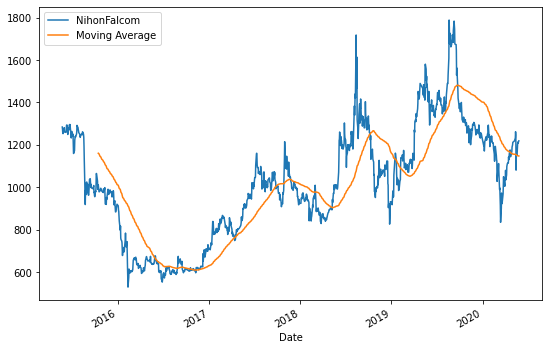

In [0]:
from datetime import timedelta,datetime
import matplotlib.dates as dates
# df["Adj Close"].plot(grid = True) 
mavg1 = df["Adj Close"].rolling(window = 100).mean()
df["Adj Close"].plot(label='NihonFalcom', figsize = (9, 6))
# plt.ylabel('Return')
mavg1.plot(label='Moving Average')
plt.legend()

## Return Rate

Date
2015-05-25         NaN
2015-05-26   -0.008346
2015-05-27   -0.013772
2015-05-28   -0.002327
2015-05-29    0.018663
                ...   
2020-05-19    0.024284
2020-05-20    0.016935
2020-05-21    0.009992
2020-05-22   -0.004122
2020-05-25    0.009106
Name: Adj Close, Length: 1243, dtype: float64

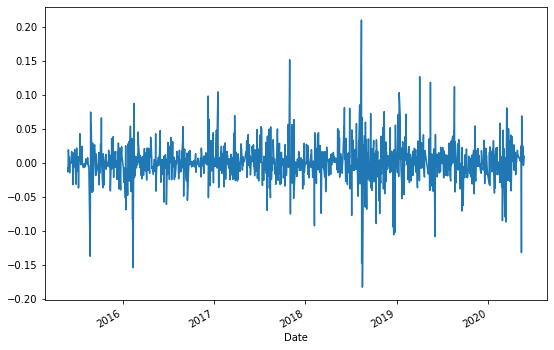

In [0]:
# np.log(ret)
ret = df['simple return'] = df['Adj Close'] / df['Adj Close'].shift(1) - 1
ret.plot(label='return', figsize = (9,6))
ret

## Volatality

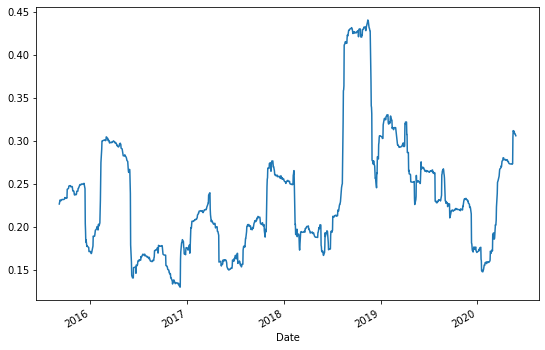

In [0]:
min_periods = 75 
# Calculate the volatility
vol = ret.rolling(min_periods).std() * np.sqrt(min_periods) 
vol.plot(figsize = (9,6))
plt.show()

## Cumulative Return

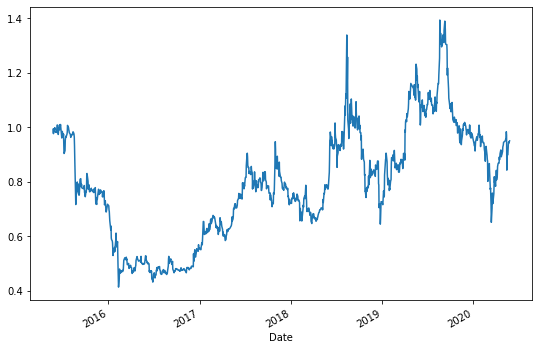

In [0]:
df['cumreturns'] = (1 + ret).cumprod()
df
df['cumreturns'].plot(figsize = (9,6))

## Average returns for 1 year

In [0]:
avg_returns_a = df['simple return'].mean()* 365   # calculating the annual avg return 
avg_returns_a
print(str(round(avg_returns_a,5)*100) + ' %')

13.011000000000001 %


## Calculating Profit and Loss

In [0]:
short_window = 40
long_window = 100
signals = pd.DataFrame(index = df.index)
signals['signal'] = 0.0
signals['short_mavg'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
signals['long_mavg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]  > signals['long_mavg'][short_window:], 1.0, 0.0)   

signals['positions'] = signals['signal'].diff()
print(signals)

            signal   short_mavg    long_mavg  positions
Date                                                   
2015-05-25     0.0  1318.000000  1318.000000        NaN
2015-05-26     0.0  1312.500000  1312.500000        0.0
2015-05-27     0.0  1304.666667  1304.666667        0.0
2015-05-28     0.0  1300.000000  1300.000000        0.0
2015-05-29     0.0  1302.000000  1302.000000        0.0
...            ...          ...          ...        ...
2020-05-19     0.0  1115.875000  1150.170000        0.0
2020-05-20     0.0  1122.200000  1149.650000        0.0
2020-05-21     0.0  1129.450000  1148.840000        0.0
2020-05-22     0.0  1135.425000  1148.010000        0.0
2020-05-25     0.0  1140.575000  1147.690000        0.0

[1243 rows x 4 columns]


In [0]:
initial_capital= float(100000.0)
positions = pd.DataFrame(index=signals.index).fillna(0.0)
positions['Falcom'] = 100 * signals['signal']   
portfolio = positions.multiply(df['Adj Close'], axis=0)
pos_diff = positions.diff()
portfolio['holdings'] = (positions.multiply(df['Adj Close'], axis=0)).sum(axis=1)
portfolio['cash'] = initial_capital - (pos_diff.multiply(df['Adj Close'], axis=0)).sum(axis=1).cumsum()   
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()
portfolio

,Falcom,holdings,cash,total,returns
Date,,,,,
2015-05-25,0.0,0.0,100000.0000,100000.0000,NaN
2015-05-26,0.0,0.0,100000.0000,100000.0000,0.0
2015-05-27,0.0,0.0,100000.0000,100000.0000,0.0
2015-05-28,0.0,0.0,100000.0000,100000.0000,0.0
2015-05-29,0.0,0.0,100000.0000,100000.0000,0.0
...,...,...,...,...,...
2020-05-19,0.0,0.0,138612.9396,138612.9396,0.0
2020-05-20,0.0,0.0,138612.9396,138612.9396,0.0
2020-05-21,0.0,0.0,138612.9396,138612.9396,0.0


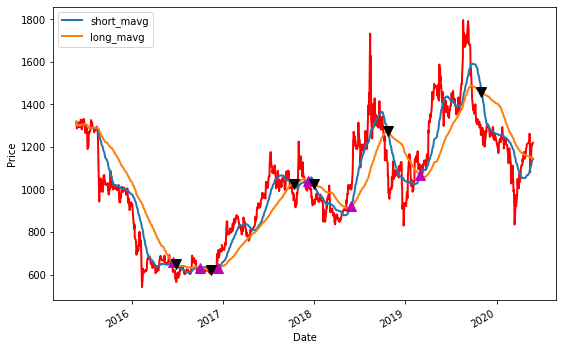

In [0]:
fig = plt.figure()
ax1 = fig.add_subplot(111,  ylabel='Price')
df['Close'].plot(ax=ax1, color='r', lw=2.)
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2., figsize = (9, 6))

# Plotting the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
plt.show()